## Test

In [ ]:
from src.linear_causality import LinearLKInformationFlow
import numpy as np
from tqdm import tqdm
# from causality_subspace import causality_subspace

dt=1
pn=1
T1=[];T2=[]
# pca = PCA(n_components=5)  # 假设我们想将数据降到2维  
Nt=100000
np.random.seed = 5
# for i in tqdm(range(100)):
X1=np.random.randn(5,Nt)*0.2
X2=np.random.randn(5,Nt)*0.2

A1=np.array([[0.9,0.6,0,0.6,0],[0,0.8,0.6,0,0.6],[0,0,0.9,0,0],[0,0,0,0.2,0],[0,0,0,0,0.2]]).T
A2=np.array([[0.2,0.6,0,0.6,0],[0,0.2,0.6,0,0.6],[0,0,0.2,0,0],[0,0,0,0.2,0],[0,0,0,0,0.2]]).T

B1=-np.array([[0,0,0,0,0],[0,0.,0,0,0],[0,0,0,0.9,0.],[0,0,0,0.,0],[0,0,0,0,0]])
B2=-np.array([[0,0,0,0,0],[0,0.0,0,0,0],[0,0,0,0,0],[0,0,0,0.4,0],[0,0,0,0,0]])
for it in range(1,Nt):
    X1[:,it]=A1@X1[:,it-1]+X1[:,it]+1*B1@X2[:,it-1] 
    X2[:,it]=A2@X2[:,it-1]+X2[:,it]+1*B2@X1[:,it-1] 
    
XX=np.zeros([10,Nt])
XX[:5]=X1
XX[5:]=X2

In [2]:
segments = [(2,3),(8,9)]
segments = [(0, 5),(5,10)]

In [3]:
lkif = LinearLKInformationFlow(np,1)
lkif.causality_estimate(XX[:,-15000:].T, lag_list=[1], segments=segments)

In [4]:
result_dict = lkif.get_dict()

In [5]:
np.abs(result_dict["information_flow"]) > result_dict["information_flow_std_origin"]*2.56

array([[ True, False],
       [ True,  True]])

In [6]:
np.abs(result_dict["information_flow"]) > result_dict["statistics"]["p99_critical_value"]

array([[ True, False],
       [ True,  True]])

In [7]:
np.abs(result_dict["information_flow"])

array([[2.02136159e+00, 6.09102085e-04],
       [2.46323188e-01, 3.98660412e+00]])

In [8]:
result_dict["information_flow_std_origin"]

array([[0.01253182, 0.00105697],
       [0.00356287, 0.01589746]])

In [9]:
result_dict["information_flow_std"]

array([[0.01253182, 0.00117544],
       [0.00522256, 0.01589746]])

---
---

## Prof. Liang's case
+ There is no information flow between X and Y in fact.
+ The original significance test, using a 90% confidence interval, will show a limited information flow.
+ The modified method, on the other hand, will correctly accept the null hypothesis ($H_0$).

In [10]:
## load data/X.dat and Y.dat
import pandas as pd
data_X = pd.read_csv('data/X.dat', header=None)
data_Y = pd.read_csv('data/Y.dat', header=None)

In [11]:
data_X = data_X.to_numpy()
data_Y = data_Y.to_numpy()

In [12]:
data = np.concatenate((data_X, data_Y), axis=1)

In [13]:
segments = [(0,1),(1,2)]

In [14]:
lkif = LinearLKInformationFlow(np,1)
lkif.causality_estimate(data, lag_list=[1], segments=segments)

In [15]:
result_dict = lkif.get_dict()

In [16]:
print('## 是否存在因果关系 (False 代表无信息流)\n')
print("### 使用原本的方差检验方法")
print("```")
print(np.abs(result_dict["information_flow"]) > result_dict["information_flow_std_origin"] * 1.65)
print("```")

print("### 使用新的方差检验方法")
print("```")
print(np.abs(result_dict["information_flow"]) > result_dict["information_flow_std"] * 1.65)
print("```")


## 是否存在因果关系 (False 代表无信息流)

### 使用原本的方差检验方法
```
[[ True False]
 [ True  True]]
```
### 使用新的方差检验方法
```
[[ True False]
 [False  True]]
```


---
---
## Bootstrap Method

In [146]:
## bootstrap
from src.linear_causality import LinearLKInformationFlow
import numpy as np
from tqdm import tqdm
# from causality_subspace import causality_subspace

dt=1
pn=1
T1=[];T2=[]
# pca = PCA(n_components=5)  # 假设我们想将数据降到2维  
Nt=100000
np.random.seed = 5
# for i in tqdm(range(100)):
X1=np.random.randn(3,Nt)
X2=np.random.randn(3,Nt)

A1=np.array([[0.9,0.6,0,],[0,0.8,0.6,],[0,0,0.2]]).T
A2=np.array([[0.2,0.6,0,],[0,0.2,0.6,],[0,0,0.2]]).T

B1=-np.array([[0.1,-0.,0.3],[0,0.4,-0.5],[-0.1,0,0]])
B2=-np.array([[0,-0.1,0.],[0,-0.3,0.1],[0,0,0.1]])
for it in range(1,Nt):
    X1[:,it]=A1@X1[:,it-1]+X1[:,it]+1*B1@X2[:,it-1] 
    X2[:,it]=A2@X2[:,it-1]+X2[:,it]+1*B2@X1[:,it-1] 
    
XX=np.zeros([6,Nt])
XX[:3]=X1
XX[3:]=X2

In [147]:
# bootstrap
import numpy as np
from sklearn.utils import resample
from tqdm import tqdm


In [148]:
segments = [(0,1),(1,2),(2,3),(3,4),(4,5),(5,6)]
lkif = LinearLKInformationFlow(np,1)
lkif.causality_estimate(XX[:,-1000:].T, lag_list=[1], segments=segments)
result_dict = lkif.get_dict()

In [149]:
bootstrap_result = lkif.bootstrap_estimate(XX[:,-1000:].T, lag_list=[1], segments=segments, bootstrap_num=1000, output_all=True)

Bootstrap Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Unbiased estimate

In [150]:
bootstrap_result["bootstrap_information_flow_mean"]

array([[-1.02250795e-01, -5.75615016e-03,  3.70686539e-03,
        -9.31379514e-03,  7.76073011e-03, -1.68046544e-02],
       [ 2.03349215e-01, -2.09465017e-01,  3.31656636e-03,
        -4.99718815e-03, -1.23480859e-01,  5.09277725e-02],
       [-1.21615306e-03,  6.80467034e-01, -8.40793039e-01,
         1.68728124e-02,  1.13069681e-02,  6.00761295e-03],
       [-8.98635219e-03,  1.68472914e-01, -2.40114142e-02,
        -8.33952341e-01,  1.43400881e-02, -5.76556069e-03],
       [ 5.64028110e-03,  4.32539095e-01, -1.02782148e-01,
         1.26693719e-01, -8.05847429e-01, -7.90139630e-03],
       [ 8.27881682e-04, -6.54671863e-03, -9.16024258e-02,
         2.08040226e-03,  3.25365048e-01, -8.18918151e-01]])

In [151]:
result_dict["information_flow"]

array([[-1.01423720e-01, -6.31807219e-03,  3.87867763e-03,
        -9.21145410e-03,  7.60379673e-03, -1.66705640e-02],
       [ 2.03763303e-01, -2.09362290e-01,  2.52968160e-03,
        -4.93357425e-03, -1.22950127e-01,  5.10671013e-02],
       [-1.40208498e-03,  6.80639520e-01, -8.40145481e-01,
         1.71140589e-02,  1.05639608e-02,  6.02810003e-03],
       [-8.98934663e-03,  1.68871347e-01, -2.39771430e-02,
        -8.34055037e-01,  1.50537304e-02, -5.83340249e-03],
       [ 5.43877933e-03,  4.33025744e-01, -1.03729706e-01,
         1.27059310e-01, -8.05440116e-01, -7.41800899e-03],
       [ 6.78809511e-04, -6.47433045e-03, -9.15195374e-02,
         2.16542991e-03,  3.25120263e-01, -8.19667748e-01]])

In [152]:
bootstrap_result["bootstrap_information_flow_mean"] - result_dict["information_flow"]

array([[-8.27074118e-04,  5.61922028e-04, -1.71812236e-04,
        -1.02341035e-04,  1.56933382e-04, -1.34090344e-04],
       [-4.14088204e-04, -1.02727015e-04,  7.86884766e-04,
        -6.36138999e-05, -5.30732522e-04, -1.39328848e-04],
       [ 1.85931928e-04, -1.72486228e-04, -6.47557654e-04,
        -2.41246520e-04,  7.43007346e-04, -2.04870791e-05],
       [ 2.99444016e-06, -3.98432864e-04, -3.42711977e-05,
         1.02695873e-04, -7.13642317e-04,  6.78417952e-05],
       [ 2.01501773e-04, -4.86649551e-04,  9.47558069e-04,
        -3.65591753e-04, -4.07313378e-04, -4.83387308e-04],
       [ 1.49072171e-04, -7.23881816e-05, -8.28884490e-05,
        -8.50276512e-05,  2.44784508e-04,  7.49597290e-04]])

Variance comparison

In [153]:
bootstrap_result["bootstrap_information_flow_std"]

array([[0.01719412, 0.0202609 , 0.01312593, 0.00295716, 0.0069564 ,
        0.0074074 ],
       [0.01038209, 0.01763679, 0.01527991, 0.00299845, 0.00891396,
        0.00585028],
       [0.00494629, 0.02375242, 0.02285986, 0.00442776, 0.01046882,
        0.00440261],
       [0.00598403, 0.029712  , 0.02681479, 0.0321227 , 0.0176954 ,
        0.00624825],
       [0.00769841, 0.03210247, 0.03025246, 0.01237522, 0.0265235 ,
        0.00735274],
       [0.00256159, 0.01758594, 0.02275494, 0.00431665, 0.0271926 ,
        0.02570919]])

In [154]:
result_dict["information_flow_std_origin"]

array([[0.0177957 , 0.01983374, 0.01304364, 0.00217639, 0.00685691,
        0.00117023],
       [0.00583368, 0.01757739, 0.01472942, 0.00306238, 0.00780806,
        0.00261297],
       [0.0050024 , 0.01920555, 0.02141416, 0.00426472, 0.01076   ,
        0.00421926],
       [0.00542144, 0.02593571, 0.02770057, 0.0312183 , 0.01648259,
        0.00601429],
       [0.00723592, 0.02801369, 0.02960726, 0.00698254, 0.02619644,
        0.00770804],
       [0.00225365, 0.0171085 , 0.02118712, 0.00464967, 0.01406674,
        0.02464396]])

In [155]:
result_dict["information_flow_std"]

array([[0.0177957 , 0.01983546, 0.01304646, 0.00294593, 0.0068925 ,
        0.00690475],
       [0.01026302, 0.01757739, 0.01472949, 0.00308596, 0.00882082,
        0.00544722],
       [0.00500336, 0.02287443, 0.02141416, 0.00442306, 0.01076398,
        0.00424049],
       [0.00575726, 0.0290263 , 0.02774926, 0.0312183 , 0.01652485,
        0.00608943],
       [0.0072532 , 0.03152247, 0.02974631, 0.01217058, 0.02619644,
        0.00772584],
       [0.00227062, 0.01711923, 0.02214262, 0.00466313, 0.02693993,
        0.02464396]])

In [156]:
rounded_information_flow = np.round(result_dict["information_flow"], 2) 

In [157]:
rounded_information_flow

array([[-0.1 , -0.01,  0.  , -0.01,  0.01, -0.02],
       [ 0.2 , -0.21,  0.  , -0.  , -0.12,  0.05],
       [-0.  ,  0.68, -0.84,  0.02,  0.01,  0.01],
       [-0.01,  0.17, -0.02, -0.83,  0.02, -0.01],
       [ 0.01,  0.43, -0.1 ,  0.13, -0.81, -0.01],
       [ 0.  , -0.01, -0.09,  0.  ,  0.33, -0.82]])

In [158]:
A = np.concatenate([np.concatenate([A1,B1],axis=1),np.concatenate([B2,A2],axis=1)],axis=0)

In [159]:
A

array([[ 0.9,  0. ,  0. , -0.1,  0. , -0.3],
       [ 0.6,  0.8,  0. , -0. , -0.4,  0.5],
       [ 0. ,  0.6,  0.2,  0.1, -0. , -0. ],
       [-0. ,  0.1, -0. ,  0.2,  0. ,  0. ],
       [-0. ,  0.3, -0.1,  0.6,  0.2,  0. ],
       [-0. , -0. , -0.1,  0. ,  0.6,  0.2]])

In [160]:
np.round(lkif.invC_mul_dC, 2) .T

array([[-0.1 , -0.01,  0.01, -0.12,  0.03, -0.33],
       [ 0.63, -0.21,  0.  , -0.05, -0.39,  0.46],
       [-0.01,  0.63, -0.84,  0.12,  0.02,  0.03],
       [-0.03,  0.12, -0.02, -0.83,  0.02, -0.02],
       [ 0.01,  0.29, -0.08,  0.57, -0.81, -0.02],
       [ 0.01, -0.01, -0.1 ,  0.01,  0.6 , -0.82]])

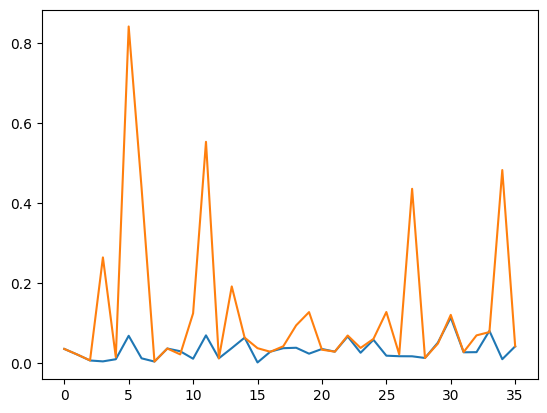

In [161]:
import matplotlib.pyplot as plt
plt.plot((np.abs(result_dict["information_flow_std"].flatten()-bootstrap_result["bootstrap_information_flow_std"].flatten()))/bootstrap_result["bootstrap_information_flow_std"].flatten())
plt.plot((np.abs(result_dict["information_flow_std_origin"].flatten()-bootstrap_result["bootstrap_information_flow_std"].flatten()))/bootstrap_result["bootstrap_information_flow_std"].flatten())
plt.show()

box plot

In [162]:
len(bootstrap_result["bootstrap_information_flow_list"])

1000

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 bootstrap_result["information_flow_list"] 是一个包含5000个N x N矩阵的列表
bootstrap_samples = bootstrap_result["bootstrap_information_flow_list"]

# 理论矩阵
theoretical_std = result_dict["information_flow_std"]  # N x N 矩阵
theoretical_std_origin = result_dict["information_flow_std_origin"]  # N x N 矩阵
theoretical_mean = result_dict["information_flow"]  # N x N 矩阵

# 获取N的大小
N = theoretical_mean.shape[0]

# 用于存储每个位置的样本值和理论值
sample_values = []
theoretical_values = {'mean': {}, 'std': {}, 'std_origin': {}}
positions = []  # 存储每个位置的 [i, j]

# 遍历所有的样本矩阵
for sample in bootstrap_samples:
    for i in range(N):
        for j in range(N):
            sample_values.append(sample[i, j])  # 取出样本矩阵中的每个元素
            positions.append(N*i+j+1)
            theoretical_values['mean'][N*i+j+1] = theoretical_mean[i, j]
            theoretical_values['std'][N*i+j+1] = theoretical_std[i, j]

# 创建一个DataFrame来便于绘图
import pandas as pd

df = pd.DataFrame({
    'Position': positions, 
    'Value': sample_values,
    'Type': ['Sample Mean'] * len(sample_values)
})


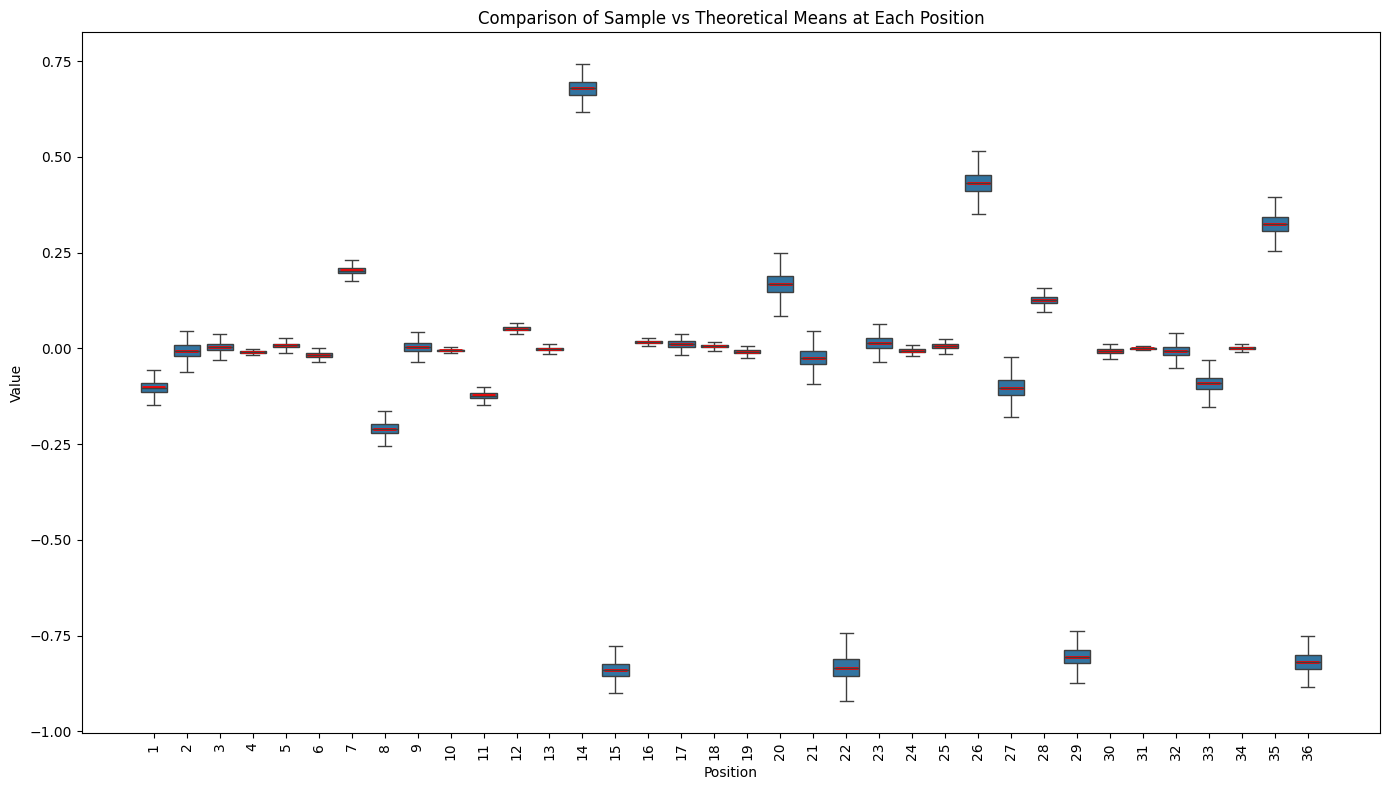

In [164]:
line_length = 0.35 
plt.figure(figsize=(14, 8))
sns.boxplot(x='Position', y='Value',  data=df, showfliers=False)
for position, mean_value in theoretical_values["mean"].items():
    plt.hlines(y=mean_value, xmin=position - line_length -1, xmax=position + line_length-1, colors='red', linewidth=2)  # 水平短横线
plt.title("Comparison of Sample vs Theoretical Means at Each Position")
plt.xticks(rotation=90)  # 使横坐标标签可读
plt.xlabel("Position")
plt.ylabel("Value")

# 显示图像
plt.tight_layout()
plt.show()

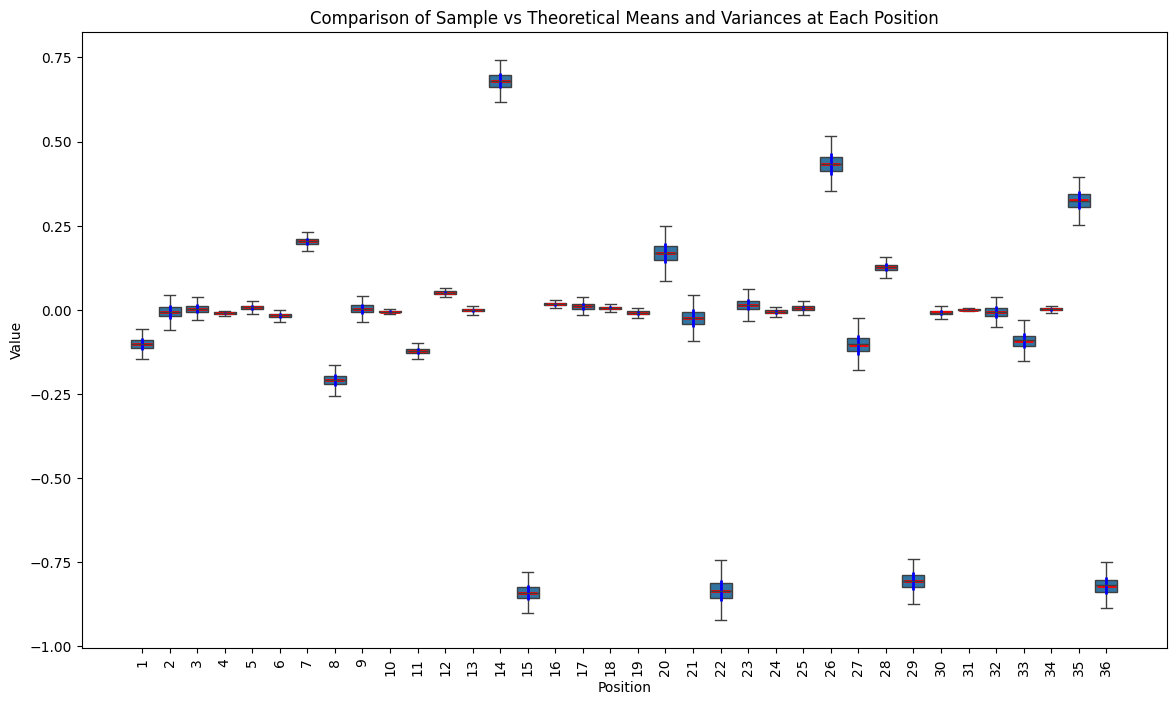

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

line_length = 0.35  
plt.figure(figsize=(14, 8))

# 画箱线图
sns.boxplot(x='Position', y='Value', data=df, showfliers=False)

# 遍历理论均值和方差
for position, mean_value in theoretical_values["mean"].items():
        std_value = theoretical_values["std"].get(position, 0)  # 获取标准差（如果不存在则默认为0）
        
        # 水平短横线表示均值
        plt.hlines(y=mean_value, xmin=position - line_length - 1, xmax=position + line_length - 1, colors='red', linewidth=2)
        # plt.fill_between(positions - 1, mean_value - std_value, mean_value + std_value, color='blue', alpha=0.2, label="Theoretical Variance")

        # # 垂直线表示均值 ± 标准差
        plt.vlines(x=position - 1, ymin=mean_value - std_value, ymax=mean_value + std_value, colors='blue', linewidth=2)

plt.title("Comparison of Sample vs Theoretical Means and Variances at Each Position")
plt.xticks(rotation=90)
plt.xlabel("Position")
plt.ylabel("Value")
plt.show()


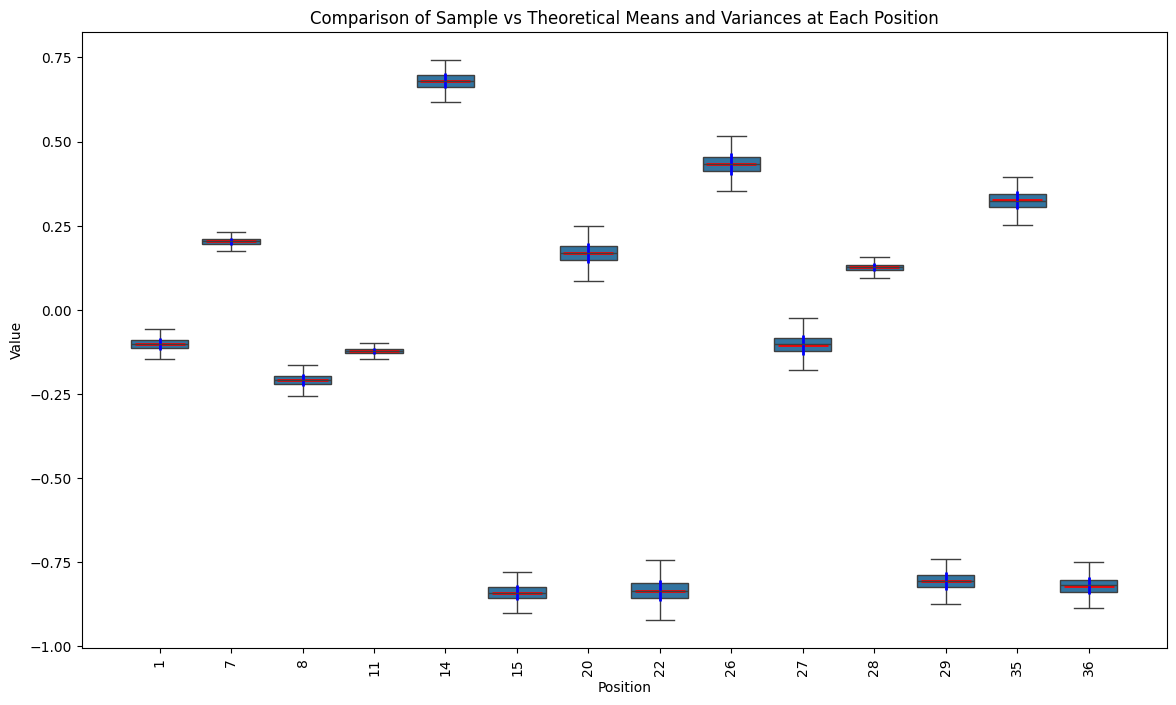

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

line_length = 0.35  
plt.figure(figsize=(14, 8))

# 先筛选符合 |mean_value| > 0.1 的 Position
valid_positions = {pos for pos, mean in theoretical_values["mean"].items() if np.abs(mean) > 0.1}

# 过滤 df
df_filtered = df[df["Position"].isin(valid_positions)]

# 画箱线图
ax = sns.boxplot(x='Position', y='Value', data=df_filtered, showfliers=False)

# 获取 Seaborn 处理后的 x 轴坐标
positions_map = {int(pos.get_text()): i for i, pos in enumerate(ax.get_xticklabels())}

# 遍历理论均值和方差
for position in valid_positions:
    if position not in positions_map:
        continue

    x_pos = positions_map[position]  # 获取类别映射的数值索引
    mean_value = theoretical_values["mean"][position]
    std_value = theoretical_values["std"].get(position, 0)

    # 水平短横线表示均值
    plt.hlines(y=mean_value, xmin=x_pos - line_length, xmax=x_pos + line_length, colors='red', linewidth=2)

    # 垂直线表示均值 ± 标准差
    plt.vlines(x=x_pos, ymin=mean_value - std_value, ymax=mean_value + std_value, colors='blue', linewidth=2)

plt.title("Comparison of Sample vs Theoretical Means and Variances at Each Position")
plt.xticks(rotation=90)
plt.xlabel("Position")
plt.ylabel("Value")
plt.show()
